##kNN and SVM : An artificial example
Let's try a few different classifiers in sklearn.


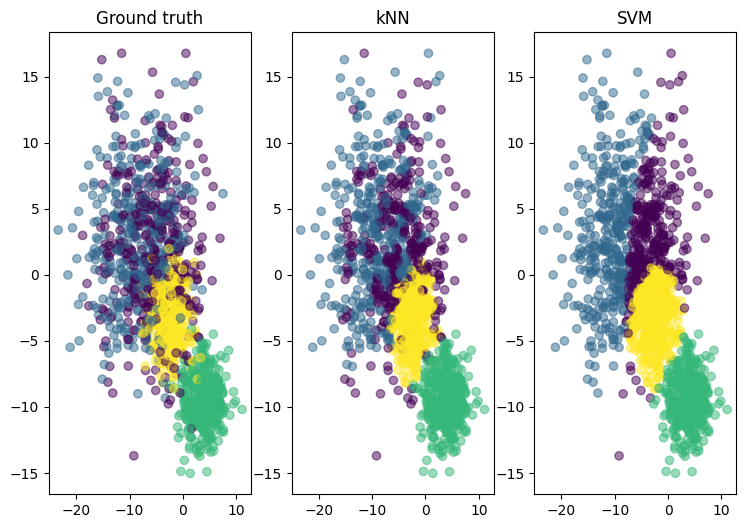

kNN score:   0.797
SVM score:   0.733

kNN score, cross validated:   0.696
SVM score, cross validated:   0.729


In [ ]:
# A few sklearn classifiers on synthetic data

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# data parameters
n_samples = 1500
n_blobs=4

# make data with different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, 
    centers=n_blobs,
    cluster_std=np.random.choice( # randomize variance of each cluster
        [1.0, 5.0, 2.0], 
        size=n_blobs, 
        replace=True
    )
)

# knn
knn_clf = KNeighborsClassifier(n_neighbors=5) # instantiate
knn_clf.fit(X_varied, y_varied)               # fit
y_knn = knn_clf.predict(X_varied)             # predict

# svm
svm_clf = SVC()
svm_clf.fit(X_varied, y_varied)
y_svm = svm_clf.predict(X_varied)

# plot results
# set up plot
plt.figure(figsize=(12, 6))
# input data
plt.subplot(141)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied, alpha=0.5)
plt.title("Ground truth")

# knn
plt.subplot(142)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_knn, alpha=0.5)
plt.title("kNN")

# svm
plt.subplot(143)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_svm, alpha=0.5)
plt.title("SVM")
plt.show()

# scoring (naive, not cross-validated)
print(f"kNN score:   {knn_clf.score(X_varied, y_varied):.3f}")
print(f"SVM score:   {svm_clf.score(X_varied, y_varied):.3f}")

# scoring (with cross validation)
print(f"\nkNN score, cross validated:   {np.mean(cross_val_score(knn_clf, X_varied, y_varied)):.3f}")
print(f"SVM score, cross validated:   {np.mean(cross_val_score(svm_clf, X_varied, y_varied)):.3f}")